In [1]:
import sys
sys.path.append("../src")

In [2]:
from IPython.display import display, HTML
from Utils import *

In [3]:
rnu = RedditNetworkUtils()

In [4]:
users_similarity, users_common_e, users_subjectivity, subreddit_subjectivity\
        = rnu.calculate_users_similarity("../data/RC_2013-02", maxsize=5e3)

Users: 3604
Subreddit: 1010


In [66]:
authors = dict()
links = dict()
with open("../data/RC_2013-02") as f:
    for i, l in enumerate(f):
        comment = json.loads(l)
        authors[comment['parent_id']] = comment['author']
        links[comment['parent_id']] = comment['link_id']
        if i+1==10000: break

In [67]:
for f, t in links.items():
    try:
        if (authors[f] != authors[t]):
            print(authors[f], authors[t])
    except KeyError:
        continue

(u'DJ_IllI_Ill', u'Fanzellino')
(u'Drew-', u'fastattaq')
(u'[deleted]', u'calebkraft')
(u'PackmanR', u'Somecookies')
(u'lol2034', u'burken8')
(u'IllIllIII', u'PineappleMeister')
(u'MadMathmatician', u'[deleted]')
(u'eyeseawhatudidthere', u'spacemanspiff30')
(u'bovisrex', u'bumbletowne')
(u'ZorbaTHut', u'410LaxMD')
(u'[deleted]', u'Xirema')
(u'XavierScorpionIkari', u'knickersnifter')
(u'Badd_Smoothie', u'Duelfapper')
(u'ThePowerOfBeard', u'FlamingoAsparagus')
(u'[deleted]', u'RatherTall')
(u'rabidsi', u'raychulwhere')
(u'TEARANUSSOREASSWREX', u'DriveByStoning')
(u'[deleted]', u'spamme')
(u'dakaf_fal', u'Garrison_Halibut')
(u'[deleted]', u'skerfuffle')
(u'bamshoulddie', u'FreedomOfTRUTH')
(u'Damocles2010', u'Givnsomeladyboners')
(u'[deleted]', u'adapolski')
(u'naivat10', u'Soupythegreat')
(u'[deleted]', u'lawmedy')
(u'arealkillerthrowaway', u'bannister4102')
(u'[deleted]', u'blargblargityblarg')
(u'pyow_pyow', u'Daniel_The_Thinker')
(u'kevka', u'Hallo457')
(u'[deleted]', u'jturgeon228')


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
x, y = np.zeros(len(users_similarity)), np.zeros(len(users_similarity))

In [45]:
for i, ((u1, u2), sim) in enumerate(users_similarity.items()):
    x[i] = sim
    y[i] = abs(users_subjectivity[u1] - users_subjectivity[u2])

In [35]:
max_sim = -1
for i, (us, sim) in enumerate(users_similarity.items()):
    if sim > max_sim:
        max_sim = sim
max_sim

0.75

In [36]:
max_sim = -1
for i, (us, sim) in enumerate(users_common_e.items()):
    if sim > max_sim:
        max_sim = sim
max_sim

0.5

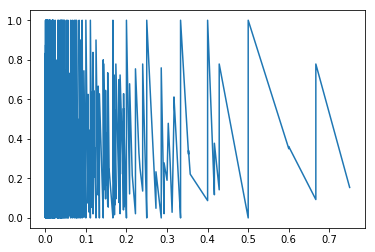

In [59]:
x,y = zip(*sorted(zip(x,y)))
plt.plot(x,y)
# plt.xlim((0, 1))